# Example - Recognising Hand Written 0s and 1s

Download MNIST dataset from [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/) before proceeding

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mnist
from nn.loss import BinaryCrossEntropy
from nn.layer import Dense
from nn.model import NeuralNetwork
from nn.activation import ReLU, Sigmoid
from nn.callback import CSVLogger

## Prepare data

The `mnist` module will process the downloaded data to give us the train and test sets

Only examples with labels 0 and 1 are selected to make this a binary classification problem

In [2]:
x_train, y_train, x_test, y_test = mnist.create_dataset(data_dir="data")

## Create MLP model

The `layers` argument in MLP takes a Tuple of Tuples where each Tuple must have a Layer and Activation pair

In [3]:
model = NeuralNetwork(
    layers=(
        (Dense(128), ReLU()),
        (Dense(128), ReLU()),
        (Dense(1), Sigmoid())
    ),
    loss=BinaryCrossEntropy(),
    learning_rate=1.,
    regularization_factor=10.
)

## Train the model

In [4]:
model.fit(
    x_train, y_train,
    epochs=50, callbacks=(
        CSVLogger(file_path="logs.csv", overwrite=True),
    ),
    verbose=False
)

## Plot training loss

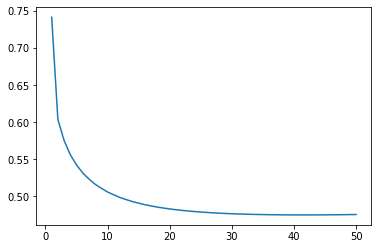

In [5]:
with open("logs.csv", "r") as f:
    data = f.read().splitlines()[1:]

epochs = []
losses = []

for row in data:
    epoch, loss = row.split(",")
    epoch = int(epoch)
    loss = float(loss)
    epochs.append(epoch)
    losses.append(loss)

plt.plot(epochs, losses)
plt.show()


## Evaluation and prediction

In [6]:
test_loss = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}")

Test loss: 0.4852526797741099


In [7]:
predictions = model.predict(x_test)

print("First 5 predictions")
print(predictions[..., :5])
print(y_test[..., :5])

First 5 predictions
[[1 1 0 0 1]]
[[0 1 0 0 1]]


In [8]:
accuracy = np.mean((predictions == y_test))

print(f"Test accuracy: {accuracy * 100: .2f}%")

Test accuracy:  85.15%
